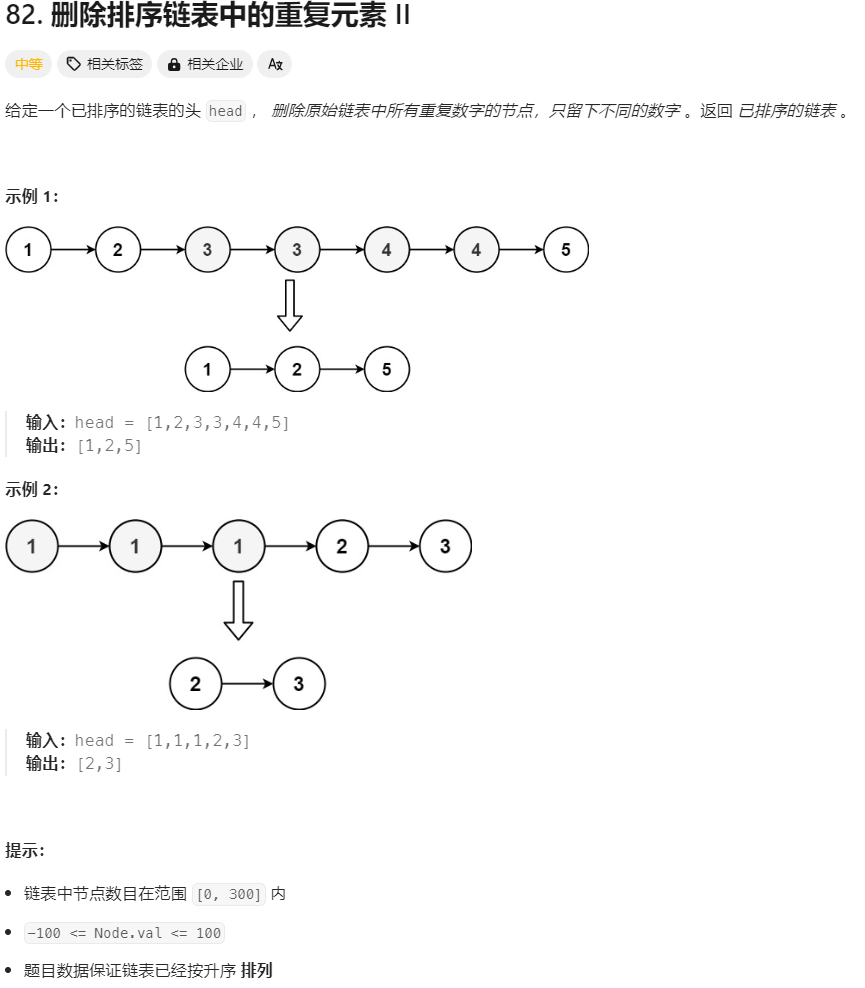

思路：  
要删除所有重复的元素，必然需要知道第一个重复元素的前驱，但这是一个单链表，因此需要一个pre记录重复元素的前驱  
对于head结点如何记录前驱呢？  
答：额外申请一个pre节点作为前驱

对pre的后两个节点进行判断  
如果val不重复 pre就后移一次
如果val重复  记录下val，然后断开前两个重复节点 即pre.next = pre.next.next 接下来继续判断是否第三个节点的val是否重复 如果重复继续断开 直到不重复  
无论何时 pre始终是不重复元素的前驱 而pre_node.next始终是链表的head结点

In [1]:
from typing import Optional
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def deleteDuplicates(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head == None:
            return head
        # 制造一个空节点 作为head的前驱
        pre_node = ListNode(0,head)
        # pre 始终指向重复节点的前驱
        pre = pre_node
        while pre.next and pre.next.next:
            # 后两个是重复元素
            if pre.next.val == pre.next.next.val:
                # 记录下重复值
                digit = pre.next.val
                # 存在下一个节点 且 下一个节点的值与重复值相等
                while pre.next and pre.next.val == digit:
                    # 向后移动一个节点 直到pre的下一个节点的值不重复
                    pre.next = pre.next.next
            # 后两个不是重复元素
            else:
                pre = pre.next
        # 真正的开始节点
        return pre_node.next

In [2]:
node4 = ListNode(3)
node3 = ListNode(2,node4)
node2 = ListNode(2,node3)
node1 = ListNode(2,node2)
head = ListNode(1,node1)
print("原链表：",end="")
p = head
while p:
    print(p.val,end=" ")
    p = p.next 

S=Solution()
head = S.deleteDuplicates(head)
print("删除重复后：",end="")
while head:
    print(head.val,end=" ")
    head = head.next 

原链表：1 2 2 2 3 删除重复后：1 3 